# Finite Difference

## Taylor-series expansion

$
{\phi _{i-1}} = {\phi _{i}} - \Delta x\left( {\frac{{d\phi }}{{dx}}} \right)_{i}^{} + \frac{1}{2}{\left( {\Delta x} \right)^2}\left( {\frac{{{d^2}\phi }}{{d{x^2}}}} \right)_{i}^{} - ...\\
$

$
{\phi _{i+1}} = {\phi _{i}} + \Delta x\left( {\frac{{d\phi }}{{dx}}} \right)_{i}^{} + \frac{1}{2}{\left( {\Delta x} \right)^2}\left( {\frac{{{d^2}\phi }}{{d{x^2}}}} \right)_{i}^{} + ...
$

Writing for the first order derivative,

## $\displaystyle {\left( {\frac{{d\phi }}{{dx}}} \right)_i} = \frac{{{\phi _i} - {\phi _{i-1}}}}{{\Delta x}}$

## $\displaystyle {\left( {\frac{{d\phi }}{{dx}}} \right)_i} = \frac{{{\phi _{i+1}} - {\phi _i}}}{{\Delta x}}$

Subtracting the Taylor-series expansion, the first order derivative can be writen as

## $\displaystyle {\left( {\frac{{d\phi }}{{dx}}} \right)_i} = \frac{{{\phi _{i+1}} - {\phi _{i-1}}}}{{2\Delta x}}$

Adding the Taylor-series expansion, the second order derivative can be written as

## $\displaystyle {\left( {\frac{{{d^2}\phi }}{{d{x^2}}}} \right)_2} = \frac{{{\phi _3} - 2{\phi _2} + {\phi _1}}}{{{{\left( {\Delta x} \right)}^2}}} $

## For the energy equation

# $
\displaystyle \frac{{{\partial ^2}T}}{{\partial {x^2}}} + S = 0
$

# $\displaystyle \frac{{{T_{i+1}} - 2{T_{i}} + {T_{i-1}}}}{{{{\left( {\Delta x} \right)}^2}}} + S = 0 $

## Assuming a uniform grid ($\Delta x = cte$), 4 points, $T(x=0)=T_A$ and $T(x=L)=T_B$

- point $0 \to T_0 = T_A$

- point $1 \to \displaystyle - T_2 + 2 T_1 - T_0 = S {\Delta x}^2$

- point $2 \to \displaystyle - T_3 + 2 T_2 - T_1 = S {\Delta x}^2$

- point $3 \to T_3 = T_B$

writing as a linear system $A x = b$

$
\left[ {\begin{array}{*{20}{c}}
1&0&0&0\\
{ - 1}&2&{ - 1}&0\\
0&{ - 1}&2&{ - 1}\\
0&0&0&1
\end{array}} \right]\left\{ {\begin{array}{*{20}{c}}
{{T_0}}\\
{{T_1}}\\
{{T_2}}\\
{{T_3}}
\end{array}} \right\} = \left\{ {\begin{array}{*{20}{c}}
{{T_A}}\\
S {\Delta x}^2\\
S {\Delta x}^2\\
{{T_B}}
\end{array}} \right\}
$

## import libraries

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from finite_difference import FiniteDifference

## No source term

### Analytical solution

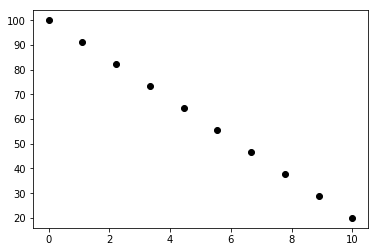

In [37]:
# Analytical solution
N = 10
L = 10. # m
T0 = 100. # degC
T1 = 20. # degC
k = 1. # W / m2 . degC
cp = 1. # 
x_analitycal = np.linspace(0., 1, N) * L
A = (T1 - T0) / L
B = T0
analytical_solution = A * x_analitycal + B
plt.scatter(x_analitycal, analytical_solution, color='black')
plt.show()

### Numerical Solution

In [38]:
num_method = FiniteDifference(4)
print(' --- Initalized')
print(num_method)

print(' --- Assembled')
num_method.AssemblyLinearSystem()
print(num_method)

print(' --- Solution')
print(num_method.Solve())

 --- Initalized
Number of points = 4
dx = 2.5
Linear system:
A =
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
b =
[ 0.  0.  0.  0.]

 --- Assembled
Number of points = 4
dx = 2.5
Linear system:
A =
[[ 1.  0.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  0.  1.]]
b =
[ 100.   -0.   -0.   20.]

 --- Solution
[ 100.           73.33333333   46.66666667   20.        ]


### Evaluating grid refinement

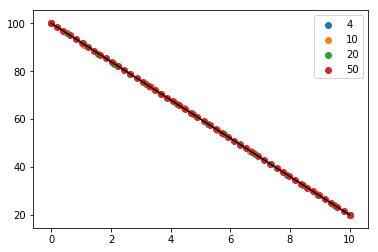

In [39]:
from finite_difference import FiniteDifference
for size in [4, 10, 20, 50]:
    num_method = FiniteDifference(size)
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(size))

plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()

## Constant Source Term = 2

### Analytical Solution

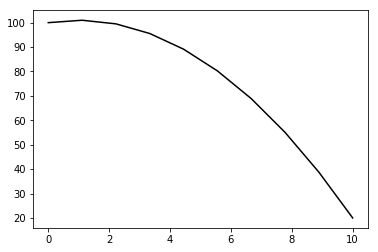

In [40]:
source_term = lambda x : 2. + x * 0
A = -1.
B = (T1 - T0) / L + L
C = T0
analytical_solution = A * x_analitycal * x_analitycal + B * x_analitycal + C

plt.plot(x_analitycal, analytical_solution, color='black')
plt.show()

### Numerical Solution

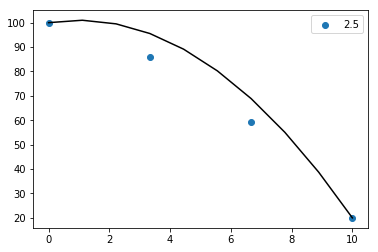

Number of points = 4
dx = 2.5
Linear system:
A =
[[ 1.  0.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  0.  1.]]
b =
[ 100.   -12.5  -12.5   20. ]



In [41]:
size = 4
num_method = FiniteDifference(size, source_term_function=source_term)
num_method.AssemblyLinearSystem()
temp = num_method.Solve()
plt.scatter(num_method._x, temp, label=str(num_method._delta_x))
plt.legend()

plt.plot(x_analitycal, analytical_solution, color='black')

plt.show()

print(num_method)

### Evaluating grid refinement

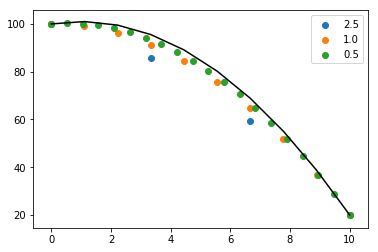

In [42]:
for size in [4, 10, 20]:
    num_method = FiniteDifference(size, source_term_function=source_term)
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(num_method._delta_x))

plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()

## Source Term function of x: S = 2. * x

### Analytical Solution¶

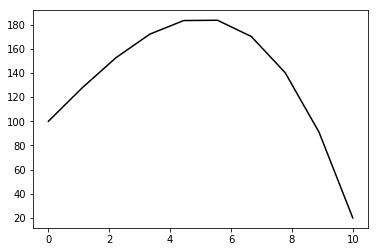

In [43]:
source_term = lambda x : 2 * x
A = - 1. / 3.
B = 0.
C = (T1 - T0) / L + L * L / 3.
D = T0
analytical_solution = A * x_analitycal * x_analitycal * x_analitycal + B * x_analitycal * x_analitycal + C * x_analitycal + D

plt.plot(x_analitycal, analytical_solution, color='black')
plt.show()

### Numerical Solution

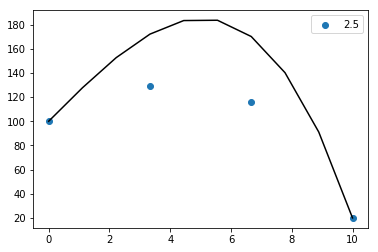

In [44]:
size = 4
num_method = FiniteDifference(size, source_term_function=source_term)
num_method.AssemblyLinearSystem()
temp = num_method.Solve()
plt.scatter(num_method._x, temp, label=str(num_method._delta_x))

plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()

### Evaluating grid refinement

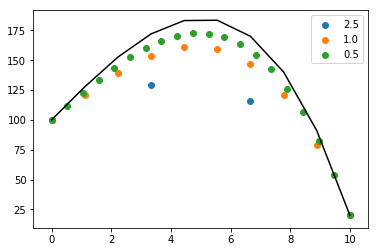

In [45]:
for size in [4, 10, 20]:
    num_method = FiniteDifference(size, source_term_function=source_term)
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(num_method._delta_x))
    
plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()